In [14]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics
import math
import json
from math import floor
from sklearn.metrics import r2_score

In [15]:
dataset = pd.read_csv('/content/AQI_delhi.csv')

In [16]:
dataset.head()

,Date,Delhi
0,2015-01-01,472.0
1,2015-01-02,454.0
2,2015-01-03,143.0
3,2015-01-04,319.0
4,2015-01-05,325.0


In [17]:
aqi_arr = dataset['Delhi'].to_numpy()
print(aqi_arr)

[472. 454. 143. ... 233. 114. 101.]


2009


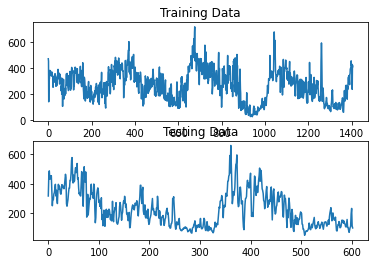

In [18]:
lengths=[0.7, 0.3]           
lookback=1                      

print(len(aqi_arr))

aqi_len=len(aqi_arr)
lim=[floor(aqi_len*lengths[0]),
     floor(aqi_len*(lengths[0]+lengths[1]))]

TrainingData=aqi_arr[:lim[0]]
TestData=aqi_arr[lim[0]:lim[1]]

fig, axs = plt.subplots(2)
axs[0].plot(TrainingData)
axs[0].set_title('Training Data')
axs[1].plot(TestData)
axs[1].set_title('Testing Data')

Xtrain,Ytrain=[],[]
Xtest,Ytest=[],[]


Xtraining=TrainingData[:-1]
Ytraining=TrainingData[1:]
for i in range(len(Xtraining)-lookback+1):
  Xtrain.append(Xtraining[i:i+lookback])
  Ytrain.append(Ytraining[i+lookback-1])

Xtesting=TestData[:-1]
Ytesting=TestData[1:]
for i in range(len(Xtesting)-lookback+1):
  Xtest.append(Xtesting[i:i+lookback])
  Ytest.append(Ytesting[i+lookback-1])

Xtrain=np.array(Xtrain)
Ytrain=np.array(Ytrain)
Xtest=np.array(Xtest)
Ytest=np.array(Ytest)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_X_train=sc.fit_transform(Xtrain)
sc_X_test=sc.fit_transform(Xtest)


In [20]:
from sklearn.tree import DecisionTreeRegressor
reg_decisiontree = DecisionTreeRegressor(random_state = 0) 

In [21]:
reg_decisiontree.fit(sc_X_train, Ytrain)

DecisionTreeRegressor(random_state=0)

In [22]:
y_pred_decisiontree = reg_decisiontree.predict(sc_X_test)


In [23]:
X1=np.arange(0,len(Ytest))

Text(0.5, 1.0, 'Decision Tree')

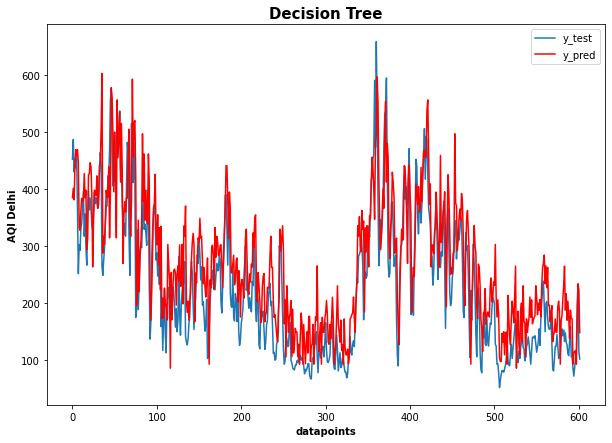

In [24]:
# plot forecasts against actual outcomes
fig, ax = plt.subplots(figsize = (10,7))
ax.plot(Ytest,label = 'y_test')
ax.plot(y_pred_decisiontree, color='red',label = 'y_pred')
ax.legend()
plt.ylabel('AQI Delhi',fontweight='bold')
plt.xlabel('datapoints',fontweight='bold')
plt.title('Decision Tree',fontweight='bold',fontsize=15)

In [25]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,median_absolute_error,r2_score

print("R2 Score = ",r2_score(Ytest, y_pred_decisiontree))
print("Variance Score = ",explained_variance_score(Ytest, y_pred_decisiontree))
print("\nMean Absolute Error (MAE) = ",mean_absolute_error(Ytest, y_pred_decisiontree))
print("Mean Squared Error (MSE) = ",mean_squared_error(Ytest, y_pred_decisiontree))
print("Root Mean Squared Error (RMSE) = ",mean_squared_error(Ytest, y_pred_decisiontree,squared=False))
print("Mean Absolute Percentage Error (MAPE) = ",mean_absolute_percentage_error(Ytest, y_pred_decisiontree))
print("Meadian Relative Absolute Error (MRAE) = ",median_absolute_error(Ytest, y_pred_decisiontree))

R2 Score =  0.6436164414770458
Variance Score =  0.7487459466701065

Mean Absolute Error (MAE) =  55.43050096359897
Mean Squared Error (MSE) =  5071.214025735926
Root Mean Squared Error (RMSE) =  71.21245695618096
Mean Absolute Percentage Error (MAPE) =  0.3255095194315562
Meadian Relative Absolute Error (MRAE) =  46.60000000000001


In [26]:
decision_tree_res=[r2_score(Ytest, y_pred_decisiontree),
         explained_variance_score(Ytest, y_pred_decisiontree),
         mean_absolute_error(Ytest, y_pred_decisiontree),
         mean_absolute_percentage_error(Ytest, y_pred_decisiontree),
         mean_squared_error(Ytest, y_pred_decisiontree,squared=False)]
print("decision_tree_res =",decision_tree_res)

decision_tree_res = [0.6436164414770458, 0.7487459466701065, 55.43050096359897, 0.3255095194315562, 71.21245695618096]
